# Discontinuity bij 145 leerlingen (kleine school)

In [11]:
import ipystata

In [12]:
%%stata  
       use "C:\Users\elmar\repos\correspondent-functiemix\Datasets\samengebrachte_data_elmar\inst.v1.dta", clear

## Eerste verkenning (grafiekjes)
Er lijkt inderdaad klein dipje te zitten in LB in 150-170 leerlingen:

(27338 missing values generated)



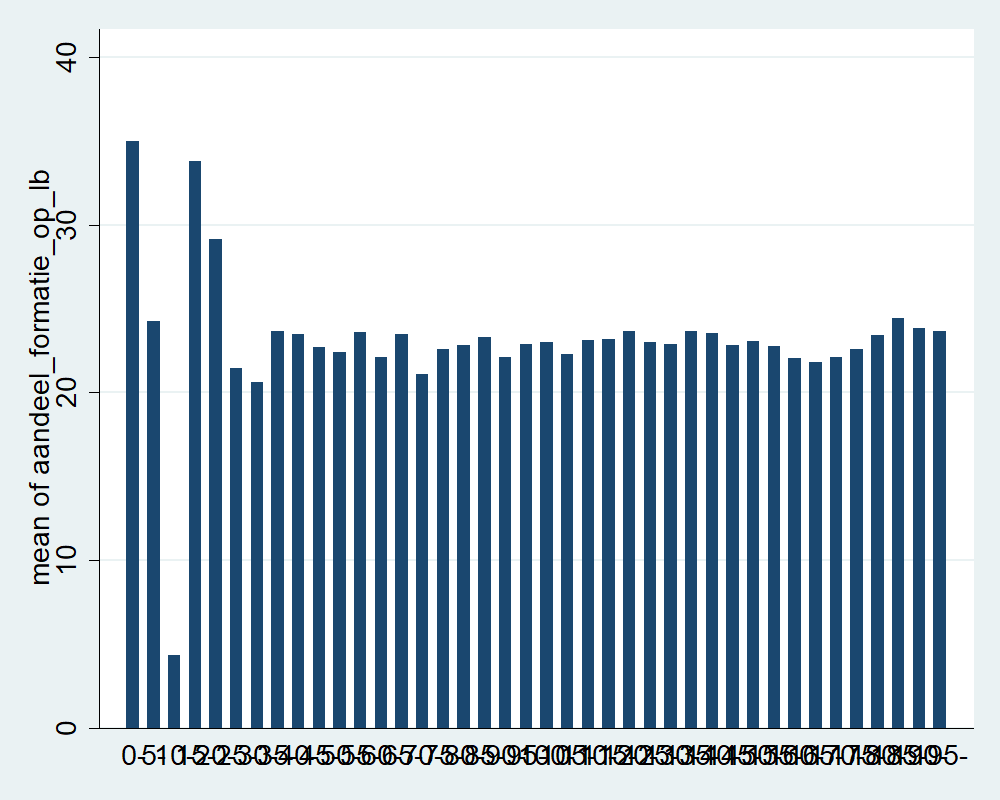

In [13]:
%%stata 
       egen aantal_group = cut(TOTAAL_AANTAL_LEERLINGEN), at(0(5)200) label
       graph bar (mean) aandeel_formatie_op_lb, over(aantal_group)

maar geen verspringing in hoeveelheid geld:

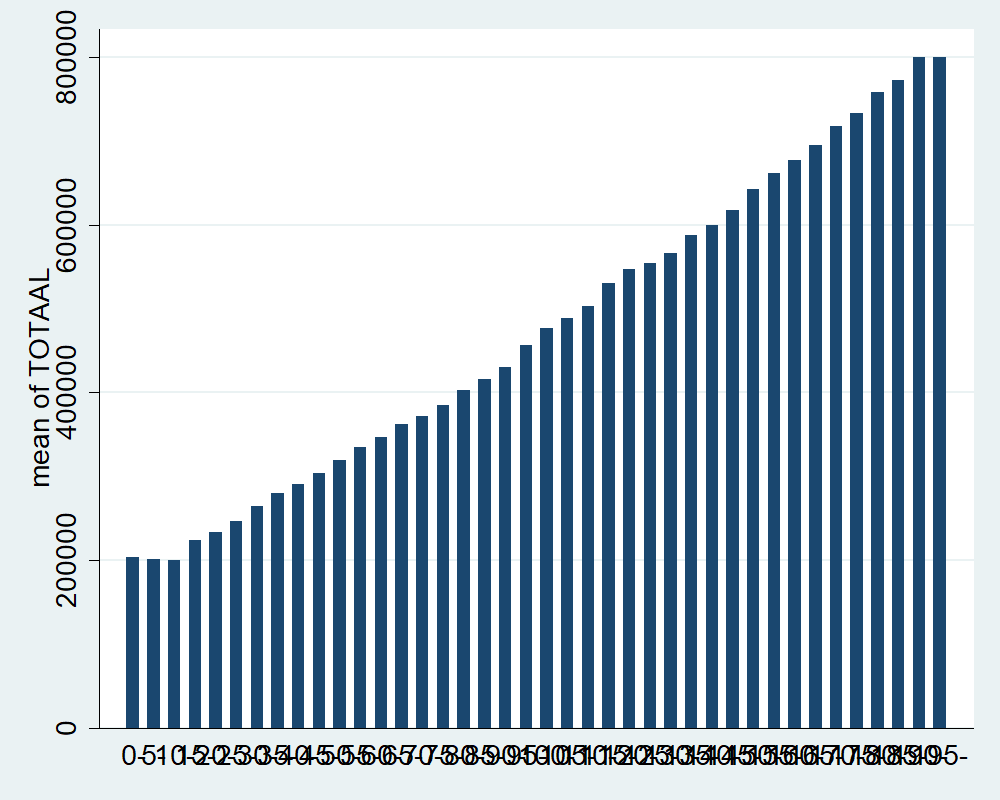

In [14]:
%%stata 
    graph bar (mean) TOTAAL, over(aantal_group)

en geen verspringing in hoeveelheid geld per leerling:

(4,869 missing values generated)



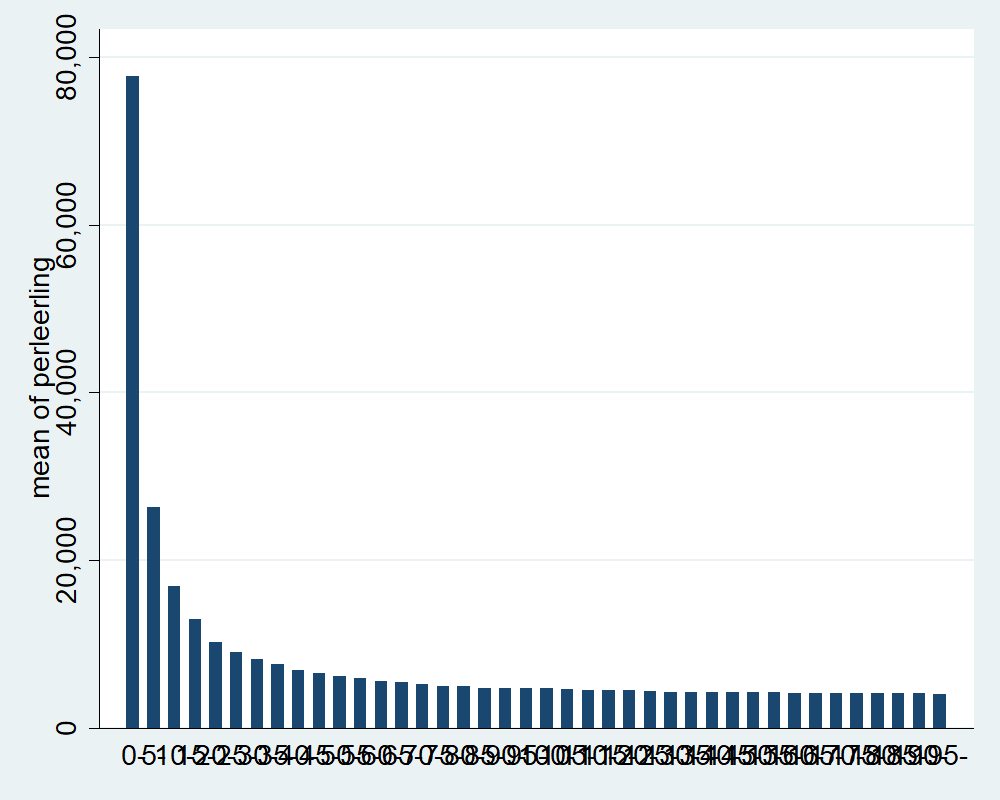

In [15]:
%%stata
    gen perleerling = TOTAAL / TOTAAL_AANTAL_LEERLINGEN
    graph bar (mean) perleerling, over(aantal_group)

dus toch wat onwaarschijnlijk dat we hiermee iets met discontinuity kunnen doen

# Formele discontinuity analyse

## Poging 1
ook formele discontinuity analysis vindt geen effect:

In [16]:
%%stata
gen klein_school_toesl = KLEINE_SCHOLEN_TOESLAG > 0

rdrobust aandeel_formatie_op_lb TOTAAL_AANTAL_LEERLINGEN, c(145)
rdrobust aandeel_formatie_op_lb TOTAAL_AANTAL_LEERLINGEN, c(145) h(5 5)
rdrobust aandeel_formatie_op_lb TOTAAL_AANTAL_LEERLINGEN, c(145) fuzzy(klein_school_toesl) if TOTAAL_AANTAL_LEERLINGEN < 300
rdrobust aandeel_formatie_op_lb TOTAAL_AANTAL_LEERLINGEN, c(145) h(5 5) fuzzy(klein_school_toesl)


Sharp RD estimates using local polynomial regression.

    Cutoff c = 145 | Left of c  Right of c            Number of obs =      37467
-------------------+----------------------            BW type       =      mserd
     Number of obs |     11132       26335            Kernel        = Triangular
Eff. Number of obs |      3292        3629            VCE method    =         NN
    Order est. (p) |         1           1
    Order bias (q) |         2           2
       BW est. (h) |    29.782      29.782
       BW bias (b) |    56.114      56.114
         rho (h/b) |     0.531       0.531

Outcome: aandeel_formatie_op_lb. Running variable: TOTAAL_AANTAL_LEERLINGEN.
--------------------------------------------------------------------------------
            Method |   Coef.    Std. Err.    z     P>|z|    [95% Conf. Interval]
-------------------+------------------------------------------------------------
      Conventional | -.64794     .72108   -0.8986  0.369   -2.06123      .765353
   

behalve iets op 152 - dat is inderdaad het kleine dipje dat we al eerder zagen, maar dus niet zoveel met grens op 145 te maken lijkt te hebben:

In [17]:
%%stata
rdrobust aandeel_formatie_op_lb TOTAAL_AANTAL_LEERLINGEN, c(152)


Sharp RD estimates using local polynomial regression.

    Cutoff c = 152 | Left of c  Right of c            Number of obs =      37467
-------------------+----------------------            BW type       =      mserd
     Number of obs |     11958       25509            Kernel        = Triangular
Eff. Number of obs |      5125        5796            VCE method    =         NN
    Order est. (p) |         1           1
    Order bias (q) |         2           2
       BW est. (h) |    46.000      46.000
       BW bias (b) |    71.232      71.232
         rho (h/b) |     0.646       0.646

Outcome: aandeel_formatie_op_lb. Running variable: TOTAAL_AANTAL_LEERLINGEN.
--------------------------------------------------------------------------------
            Method |   Coef.    Std. Err.    z     P>|z|    [95% Conf. Interval]
-------------------+------------------------------------------------------------
      Conventional | -1.2167     .56695   -2.1461  0.032   -2.32792     -.105503
   

en het is ook niet meer te vinden wanneer we kijken naar verandering (differences ipv levels) in LB en ook niet als we een grotere tijdsspanne tussen aantal-leerlingen en LB nemen:

In [18]:
%%stata
encode brin, gen(brin_num)
tsset brin_num year, yearly
gen diff_LB = d.aandeel_formatie_op_lb
gen l1_totaal = l1.TOTAAL_AANTAL_LEERLINGEN
gen l2_totaal = l2.TOTAAL_AANTAL_LEERLINGEN
gen l3_totaal = l3.TOTAAL_AANTAL_LEERLINGEN
gen klein_school_toesl = KLEINE_SCHOLEN_TOESLAG > 0
rdrobust aandeel_formatie_op_lb l2_totaal if TOTAAL_AANTAL_LEERLINGEN < 300, c(145) h(10 10)
rdrobust aandeel_formatie_op_lb l1_totaal if TOTAAL_AANTAL_LEERLINGEN < 300, c(145) h(10 10)
rdrobust aandeel_formatie_op_lb l3_totaal if TOTAAL_AANTAL_LEERLINGEN < 300, c(145) h(10 10)
rdrobust aandeel_formatie_op_lb l1_totaal if TOTAAL_AANTAL_LEERLINGEN < 300, c(145) h(5 5)
rdrobust aandeel_formatie_op_lb l1_totaal if TOTAAL_AANTAL_LEERLINGEN < 300 & year == 2015, c(145) h(5 5)
rdrobust aandeel_formatie_op_lb TOTAAL_AANTAL_LEERLINGEN if TOTAAL_AANTAL_LEERLINGEN < 300 & year == 2015, c(145) h(5 5)
rdrobust aandeel_formatie_op_lb l1_totaal if TOTAAL_AANTAL_LEERLINGEN < 300 & year == 2015, c(145) h(5 5)
rdrobust aandeel_formatie_op_lb l2_totaal if TOTAAL_AANTAL_LEERLINGEN < 300 & year == 2015, c(145) h(5 5)


       panel variable:  brin_num (unbalanced)
        time variable:  year, 2011 to 2017
                delta:  1 year

(19,544 missing values generated)

(11,099 missing values generated)

(17,918 missing values generated)

(24,671 missing values generated)

variable klein_school_toesl already defined
r(110);

Sharp RD estimates using local polynomial regression.

    Cutoff c = 145 | Left of c  Right of c            Number of obs =      23599
-------------------+----------------------            BW type       =     Manual
     Number of obs |      8891       14708            Kernel        = Triangular
Eff. Number of obs |       853         926            VCE method    =         NN
    Order est. (p) |         1           1
    Order bias (q) |         2           2
       BW est. (h) |    10.000      10.000
       BW bias (b) |    10.000      10.000
         rho (h/b) |     1.000       1.000

Outcome: aandeel_formatie_op_lb. Running variable: l2_totaal.
----------------------------